In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18,9)

In [2]:
df = pd.read_csv("../../datasets/BigThree.csv")
df.head()

,Arc,Start onChapter,TotalChapters,TotalPages,Manga%,Start onEpisode,TotalEpisodes,TotalMinutes(avg 24),Anime%,BigThree
0,Romance Dawn Arc,1.0,7,178,0.9%,1,3,72,0.3%,One Piece
1,Orange Town Arc,8.0,14,273,1.4%,4,5,120,0.5%,One Piece
2,Syrup Village Arc,22.0,20,396,2.0%,9,10,240,1.0%,One Piece
3,Baratie Arc,42.0,27,514,2.6%,19,12,288,1.2%,One Piece
4,Arlong Park Arc,69.0,27,514,2.6%,31,15,360,1.5%,One Piece


In [3]:
grouped = df.groupby("BigThree")
df.groupby("BigThree")["Arc"].count()

BigThree
Bleach       17
Naruto       37
One Piece    51
Name: Arc, dtype: int64

In [4]:
grouped["TotalEpisodes"].sum()

BigThree
Bleach        366
Naruto        720
One Piece    1028
Name: TotalEpisodes, dtype: int64

<AxesSubplot:xlabel='BigThree'>

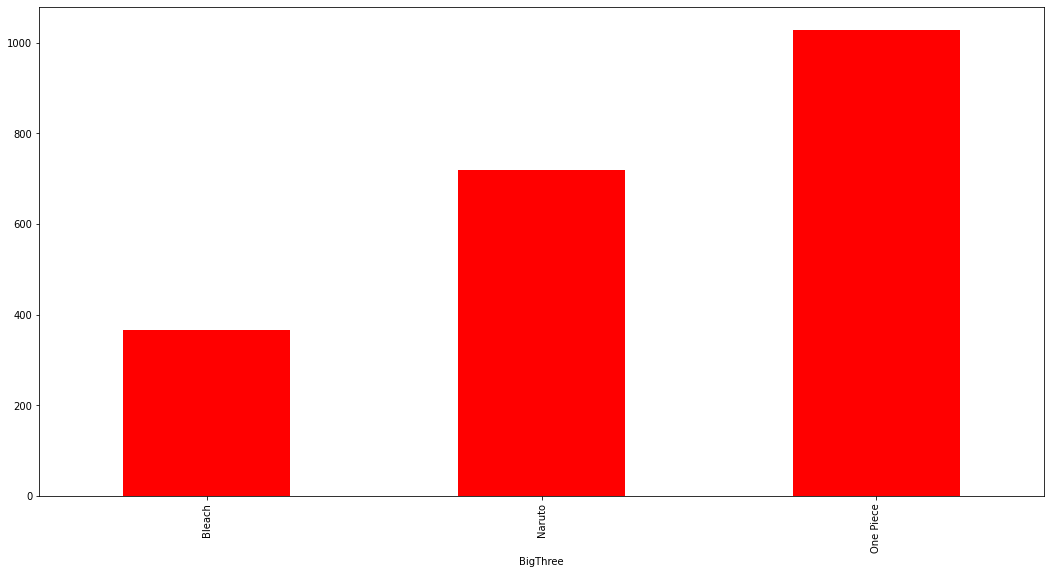

In [40]:
grouped["TotalEpisodes"].sum().plot(kind="bar", color="red")

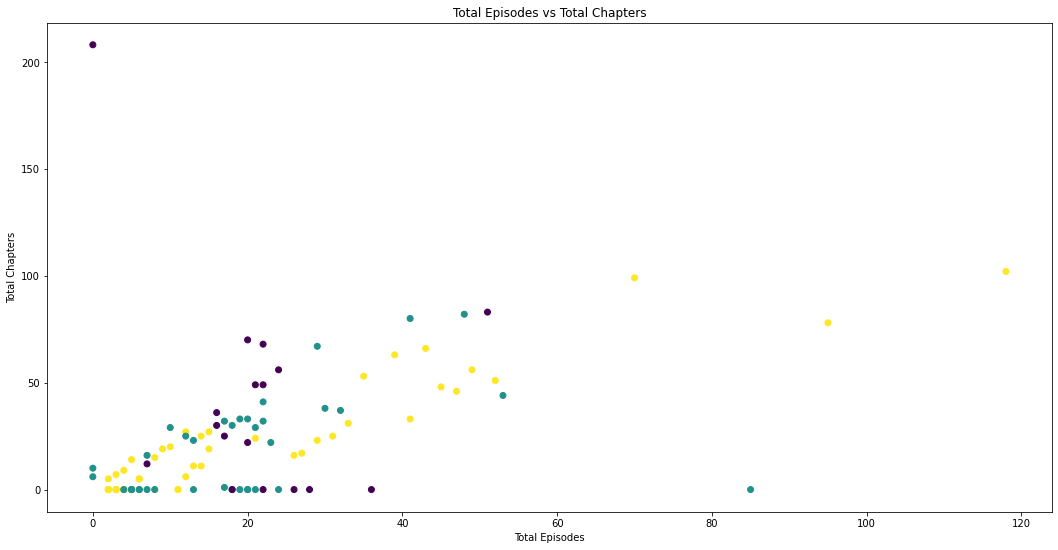

In [27]:
df["anime"] = df["BigThree"].astype("category")
df["anime"] = df["anime"].cat.codes

plt.scatter(df["TotalEpisodes"], df["TotalChapters"], c=df["anime"], cmap="viridis")
plt.xlabel("Total Episodes")
plt.ylabel("Total Chapters")
plt.title("Total Episodes vs Total Chapters")
plt.show()

In [28]:
sorted_by_episodes = df.sort_values(by=['TotalEpisodes'], ascending=False)

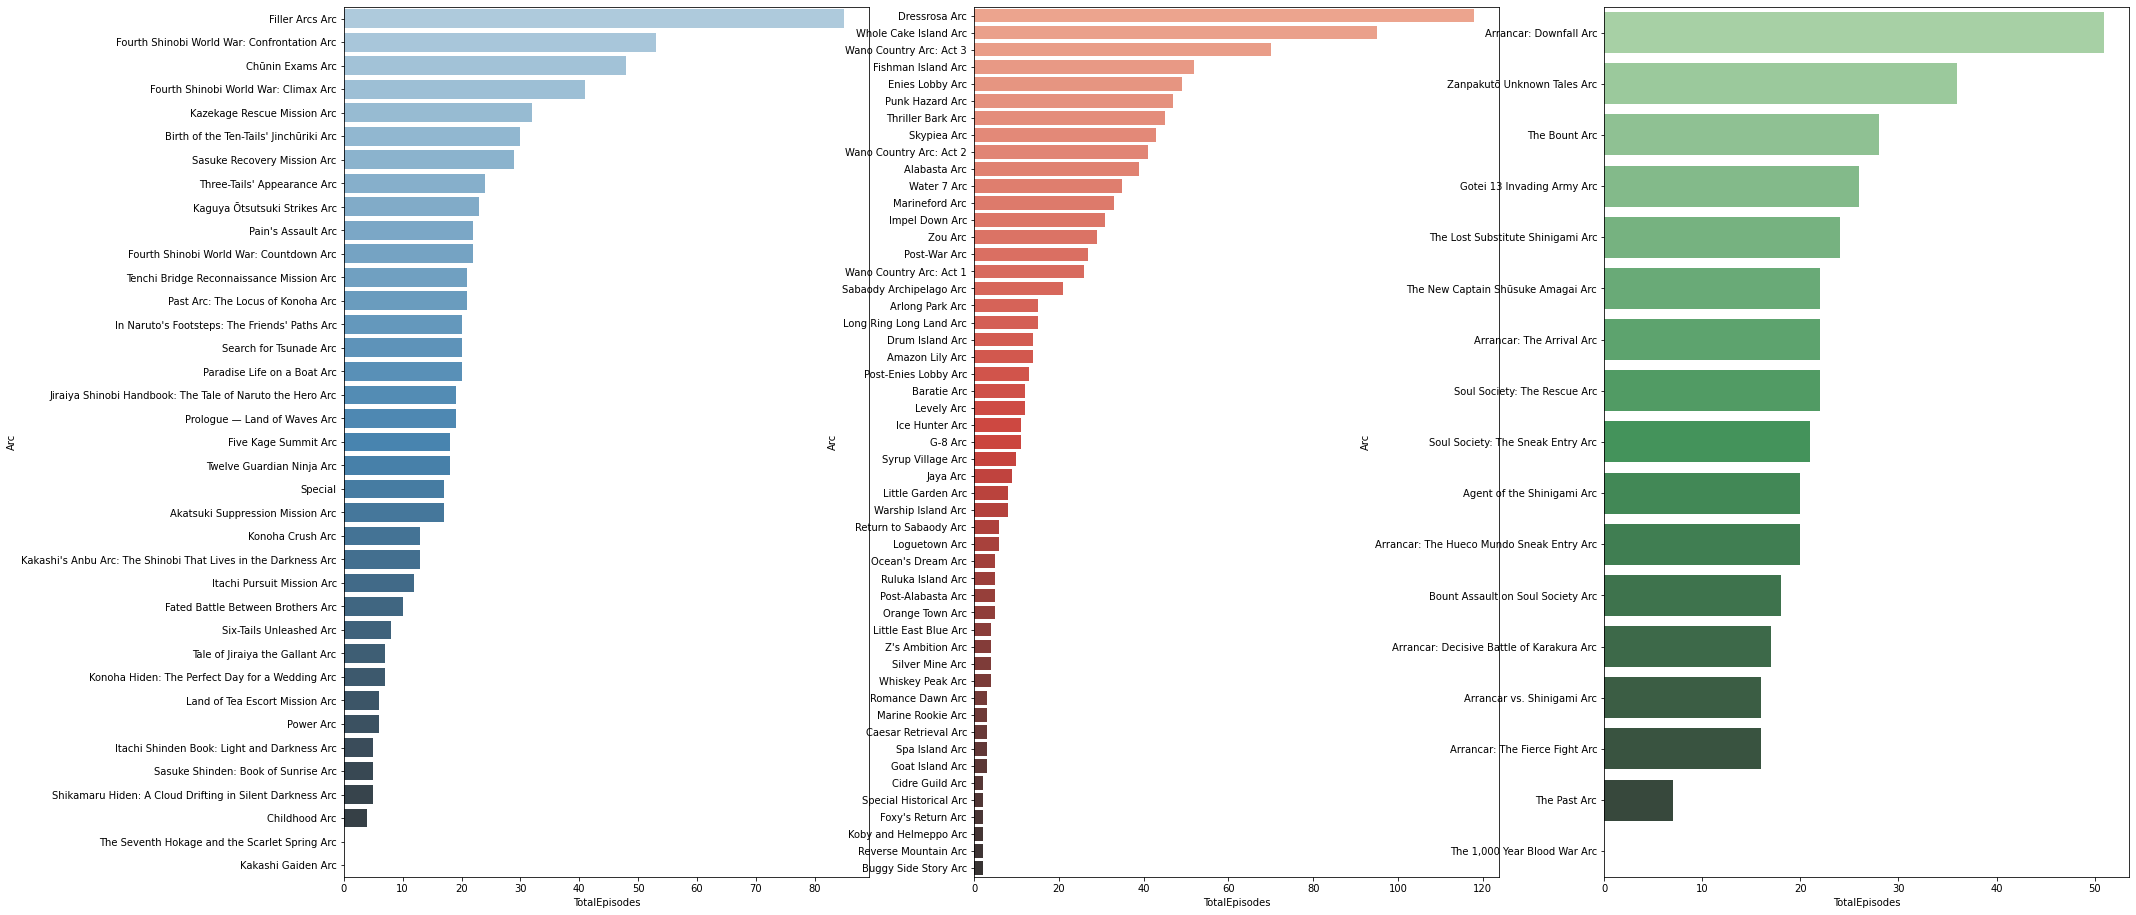

In [38]:
# make 3 bar subplots for each anime
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(32,16))
sns.barplot(x="TotalEpisodes", y="Arc", data=sorted_by_episodes[sorted_by_episodes["BigThree"] == "Naruto"], ax=axes[0], palette="Blues_d")
sns.barplot(x="TotalEpisodes", y="Arc", data=sorted_by_episodes[sorted_by_episodes["BigThree"] == "One Piece"], ax=axes[1], palette="Reds_d")
sns.barplot(x="TotalEpisodes", y="Arc", data=sorted_by_episodes[sorted_by_episodes["BigThree"] == "Bleach"], ax=axes[2], palette="Greens_d")
plt.show()